<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/211110_Student_Pass_Fail_Data_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Environment Set Up**

In [2]:
#import libraries
import numpy as np
import pandas as pd

# **Task 2: Data Collection**

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/Student-Pass-Fail-Data.csv')

In [ ]:
df1.head

<bound method NDFrame.head of          Date  ... People Not-Positive - Unknown Race/Ethnicity
0    3/1/2020  ...                                            0
1    3/2/2020  ...                                            4
2    3/3/2020  ...                                           20
3    3/4/2020  ...                                           20
4    3/5/2020  ...                                            7
..        ...  ...                                          ...
83  5/25/2020  ...                                          602
84  5/26/2020  ...                                         2692
85  5/27/2020  ...                                         2401
86  5/28/2020  ...                                         2155
87  5/31/2020  ...                                          551

[88 rows x 59 columns]>

In [8]:
df1.shape

(1000, 3)

BT: Data for 1,000 students will be studied. 

In [9]:
df1.describe

<bound method NDFrame.describe of      Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                   7              27             1
1                   2              43             0
2                   7              26             1
3                   8              29             1
4                   3              42             0
..                ...             ...           ...
995                 6              22             1
996                 9              30             1
997                 3              39             0
998                 7              25             1
999                 5              37             0

[1000 rows x 3 columns]>

In [10]:
df1.isnull().sum()

Self_Study_Daily    0
Tution_Monthly      0
Pass_Or_Fail        0
dtype: int64

BT: There are no null values in the updated .csv data file. 

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


BT: The figures in the .csv file are all integers.

# Task 3: Data Wrangling and Exploratory Data Analysis

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


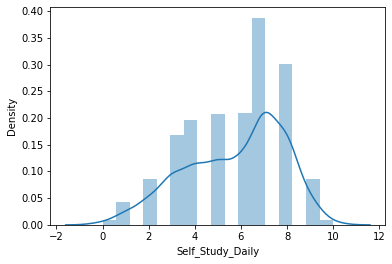

In [13]:

sns.distplot(df1['Self_Study_Daily'])

BT: This is a distribution plot of the number of hours of daily self study for different students.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


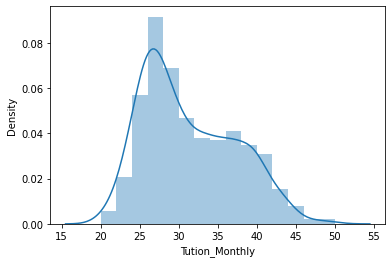

In [18]:
sns.distplot(df1['Tution_Monthly'])

BT: This is a distribution of the monthly tuition of the different students.

In [ ]:
#Positive_17 = df1['People Positive - Age 0-17']

#Positive_29 = df1['People Positive - Age 18-29']





BT: This is a line plot of the number of Covid cases for people aged 80 and older, shown by day of the month from March 1st, 2020 to May 31st, 2020. 

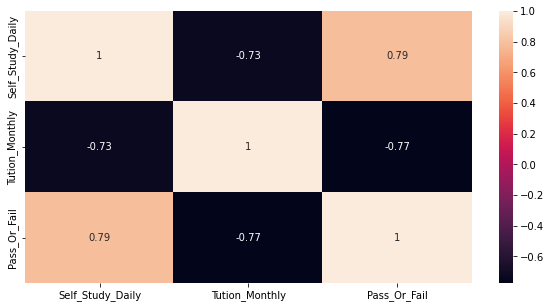

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True)

BT: Pas_Or_Fail is strongly correlated with Self_Study_Daily (.79) and negatively correlated with Tuition_Monthly (-.77). 

## Task 4: Preparing the data for training the Machine Learning Model

In [22]:
df2 = df1[['Tution_Monthly', 'Self_Study_Daily']]
df2.head()

,Tution_Monthly,Self_Study_Daily
0,27,7
1,43,2
2,26,7
3,29,8
4,42,3


In [25]:
X_features = df2
Y_target = df1['Pass_Or_Fail']

In [26]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

## Task 5: Model Training

In [27]:
# import linear model - the estimator
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_target)

In [28]:
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logReg.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1])

## Task 6: Model Evaluation

In [31]:
logReg.score(x_test, y_test)

0.98

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[119,   4],
       [  1, 126]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       123
           1       0.97      0.99      0.98       127

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [34]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'predicted value')

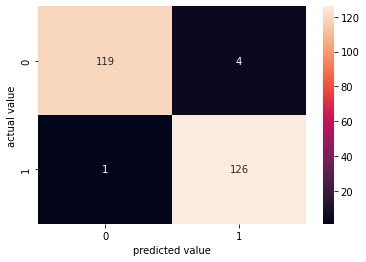

In [35]:
sns.heatmap(cm, annot=True, fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

## Conclusion
BT: The two x variables combined, Self_Study_Daily and Tution_Monthly were 98% accurate in predicting whether a student would pass or fail. That's (119 + 126)/(119 + 4 + 1 + 126) = .98, or (TN + TP)/(TN + FP + FN +TP)

The True Positive Rate was 119/(119 + 4) = .97, as indicated by 0 recall in the classification report. 

The True Negative Rate was 126/(1 + 126) = .99, as indicated by the 1 recall in the classification report. 

The average of .97 and .99 is .98, and this .98 is the Macro Average of Accuracy in the classification report. 



<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

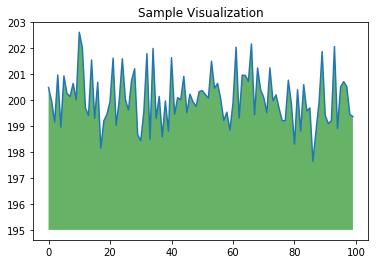

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
